In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

%matplotlib inline

In [5]:
data = pd.read_csv('C:/Users/sriji/MachineLearning/DemoDatasets/Lesson 4/Advertising.csv',index_col=0)

In [7]:
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [8]:
data.columns = ['TV','Radio','Newspaper','Sales']

In [9]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [10]:
data.shape

(200, 4)

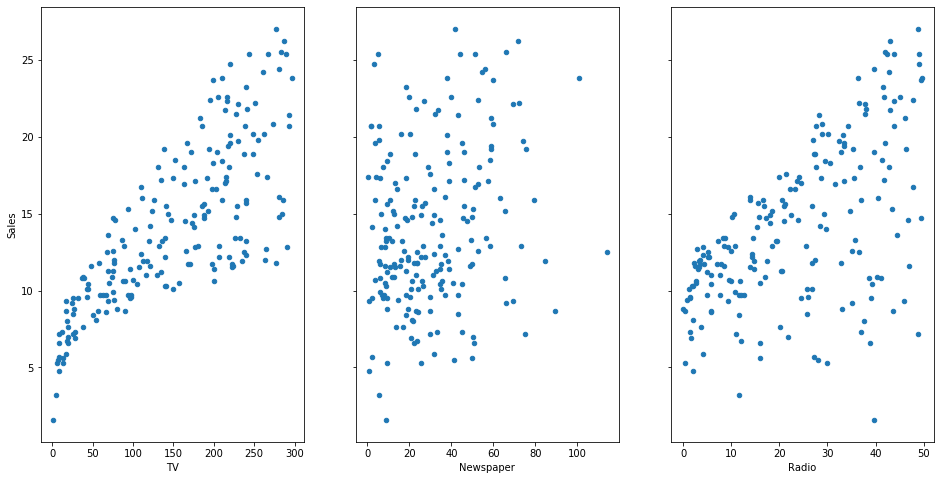

In [13]:
fig,axes = plt.subplots(1,3,sharey=True)

data.plot(kind='scatter',x='TV',y='Sales',ax=axes[0],figsize=(16,8))

data.plot(kind='scatter',x='Newspaper',y='Sales',ax=axes[1],figsize=(16,8))

data.plot(kind='scatter',x='Radio',y='Sales',ax=axes[2],figsize=(16,8))

In [14]:
feature_cols = ['TV']
x = data[feature_cols]
y = data.Sales

In [15]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
print(lm.intercept_)

print(lm.coef_)

7.032593549127693
[0.04753664]


In [18]:
# y = mx + c

0.04753664 * 50 + 7.032593549127693

9.409425549127693

In [19]:
X_new = pd.DataFrame({'TV':[50]})
X_new

,TV
0,50


In [20]:
lm.predict(X_new)

array([9.40942557])

In [21]:
X_new = pd.DataFrame({'TV':[data.TV.min(),data.TV.max()]})

X_new.head()

,TV
0,0.7
1,296.4


In [22]:
preds = lm.predict(X_new)

In [23]:
preds

array([ 7.0658692 , 21.12245377])

In [24]:
#By using the predicted values of minimum and maximum values, we can plot the values of least square line

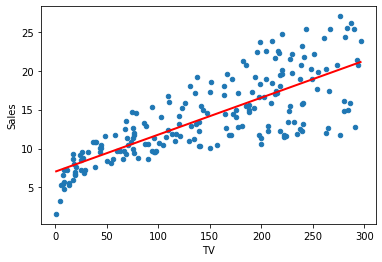

In [26]:
data.plot(kind='scatter',x='TV',y='Sales')

plt.plot(X_new,preds,c='red',linewidth=2)

In [29]:
import statsmodels.formula.api as smf

lm = smf.ols(formula='Sales ~ TV',data=data).fit()

In [30]:
lm.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [31]:
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [32]:
lm.rsquared

0.611875050850071

In [33]:
feature_cols = ['TV','Radio','Newspaper']

X = data[feature_cols]
y = data.Sales

In [34]:
from sklearn.model_selection import train_test_split as tts

In [35]:
x_train, x_test, y_train, y_test = tts(x,y,test_size=0.3,random_state=42)

In [39]:
lm = LinearRegression()

lm.fit(x,y)

print(lm.intercept_)

print(lm.coef_)

7.032593549127693
[0.04753664]


In [40]:
lm = LinearRegression()

lm.fit(x_train,y_train)

print(lm.intercept_)

print(lm.coef_)

7.239459830751143
[0.0464078]


In [41]:
predictions = lm.predict(x_test)

In [42]:
print(sqrt(mean_squared_error(y_test,predictions)))

2.995161304907236


In [43]:
lm = smf.ols(formula='Sales~TV + Radio + Newspaper',data=data).fit()

In [44]:
lm.conf_int()

lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 22 Feb 2020   Prob (F-statistic):           1.58e-96
Time:                        20:26:26   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
lm = smf.ols(formula='Sales~TV + Radio',data=data).fit()

lm.rsquared

0.8971942610828956

In [47]:
lm = smf.ols(formula='Sales~TV + Radio + Newspaper',data=data).fit()

lm.rsquared

0.8972106381789522

-----------------------------

In [48]:
# Since data has only numerical and continuos variable

# we are adding a new categorical variable

np.random.seed(12345)

nums = np.random.rand(len(data))

mask_large = nums > 0.5

In [51]:
data['Size'] = 'Small'

data.loc[mask_large,'Size'] = 'Large'

data.head()

,TV,Radio,Newspaper,Sales,Size
1,230.1,37.8,69.2,22.1,Large
2,44.5,39.3,45.1,10.4,Small
3,17.2,45.9,69.3,9.3,Small
4,151.5,41.3,58.5,18.5,Small
5,180.8,10.8,58.4,12.9,Large


In [52]:
# creating dummy variables to represent categorical variable

data['isLarge'] = data.Size.map({'Small':0,'Large':1})

data.head()

,TV,Radio,Newspaper,Sales,Size,isLarge
1,230.1,37.8,69.2,22.1,Large,1
2,44.5,39.3,45.1,10.4,Small,0
3,17.2,45.9,69.3,9.3,Small,0
4,151.5,41.3,58.5,18.5,Small,0
5,180.8,10.8,58.4,12.9,Large,1


In [53]:
feature_cols = ['TV','Radio','Newspaper','isLarge']

X = data[feature_cols]

y = data.Sales

lm = LinearRegression()

In [54]:
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
np.random.seed(123456)

nums = np.random.rand(len(data))

mask_suburban = (nums > 0.33) & (nums < 0.66)

mask_urban = (nums > 0.66)

data['Area']='Rural'

data.loc[mask_suburban,'Area'] = 'Suburban'

data.loc[mask_urban,'Area'] = 'Urban'

In [59]:
data.head()

,TV,Radio,Newspaper,Sales,Size,isLarge,Area
1,230.1,37.8,69.2,22.1,Large,1,Rural
2,44.5,39.3,45.1,10.4,Small,0,Urban
3,17.2,45.9,69.3,9.3,Small,0,Rural
4,151.5,41.3,58.5,18.5,Small,0,Urban
5,180.8,10.8,58.4,12.9,Large,1,Suburban


In [61]:
area_dummies = pd.get_dummies(data.Area,prefix='Area').iloc[:,:1]

data = pd.concat([data,area_dummies],axis=1)

    

In [62]:
data.head()

,TV,Radio,Newspaper,Sales,Size,isLarge,Area,Area_Rural
1,230.1,37.8,69.2,22.1,Large,1,Rural,1
2,44.5,39.3,45.1,10.4,Small,0,Urban,0
3,17.2,45.9,69.3,9.3,Small,0,Rural,1
4,151.5,41.3,58.5,18.5,Small,0,Urban,0
5,180.8,10.8,58.4,12.9,Large,1,Suburban,0


In [63]:
 feature_cols = ['TV','Radio','Newspaper','isLarge','Area_Rural']
    
X = data[feature_cols]

y = data.Sales

In [64]:
lm = LinearRegression()
lm.fit(X,y)

print(feature_cols,lm.coef_)


['TV', 'Radio', 'Newspaper', 'isLarge', 'Area_Rural'] [ 0.04572184  0.18871381 -0.00105238  0.06573499 -0.05861186]
